# (29) Balls dataset

**Motivation**: Make balls dataset work (from additive decoder paper). Status: DONE! Saved at ```~/Datasets/BALLS/``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from analysis.eval import sparse_score
from figures.fighelper import *
from vae.train_vae import *

sys.path.insert(0, os.path.join(git_dir, '[git-cloned]/additive_decoder_extrapolation'))

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from base.balls import balls_save_dataset

## Save

npix = [16, 32, 64]

In [4]:
root = '/home/hadi/Datasets/BALLS'

In [5]:
%%time

for npix in [16, 32, 64]:
    balls_save_dataset(root, npix=npix)

[PROGRESS] 'z.npy' saved at
/home/hadi/Datasets/BALLS/npix-16

[PROGRESS] 'x.npy' saved at
/home/hadi/Datasets/BALLS/npix-16

[PROGRESS] 'z_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-16

[PROGRESS] 'x_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-16

[PROGRESS] 'z.npy' saved at
/home/hadi/Datasets/BALLS/npix-32

[PROGRESS] 'x.npy' saved at
/home/hadi/Datasets/BALLS/npix-32

[PROGRESS] 'z_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-32

[PROGRESS] 'x_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-32

[PROGRESS] 'z.npy' saved at
/home/hadi/Datasets/BALLS/npix-64

[PROGRESS] 'x.npy' saved at
/home/hadi/Datasets/BALLS/npix-64

[PROGRESS] 'z_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-64

[PROGRESS] 'x_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-64

CPU times: user 30.4 s, sys: 8.03 s, total: 38.4 s
Wall time: 38.5 s


## Stuff

In [73]:
from base.balls import balls_sample_latents, render_imgs

In [75]:
npix = 16
bounds = (0, 5)
trn_size, tst_size = 8000, 5000

z, z_tst = balls_sample_latents(trn_size, tst_size, bounds)

In [76]:
x_tst = render_imgs(z_tst, npix, bounds)

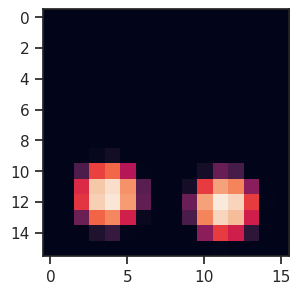

In [78]:
plt.imshow(x_tst[8])

In [56]:

def render_imgs(
		z: np.ndarray,
		npix: int = 64,
		bounds: Tuple[float, float] = (0, 5), t: float = 1.0):
	xx, yy = np.meshgrid(
		np.linspace(*bounds, npix),
		np.linspace(*bounds, npix),
	)
	x1, y1, x2, y2 = z.T
	b1 = bump2d(x1, y1, xx, yy, t=t)
	b2 = bump2d(x2, y2, xx, yy, t=t)
	return b1 + b2


def bump2d(x, y, xx, yy, t=1):
	x = np.reshape(x, (-1, 1, 1))
	y = np.reshape(y, (-1, 1, 1))

	r2 = (x - xx) ** 2 + (y - yy) ** 2
	r2 = np.clip(r2, None, 0.999)

	cond = np.sqrt(r2) < 1
	val = np.exp(t - t / (1 - r2))

	return np.where(cond, val, 0)

In [57]:
# x_tst = render_imgs(z_tst, npix, bounds)

temp = 1

, t=temp)

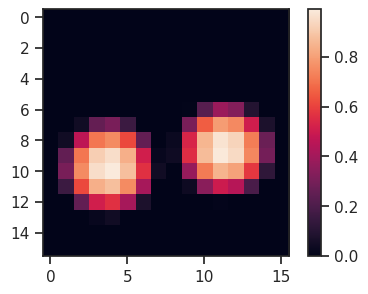

In [72]:
fig, ax = create_figure()
im = ax.imshow(x_tst[18])
plt.colorbar(im, ax=ax)
plt.show()

## npix = 64

In [2]:
from base.balls import balls_save_dataset

In [3]:
save_dir = '/home/hadi/Datasets/BALLS'
os.listdir(save_dir)

[]

In [4]:
%%time

balls_save_dataset(save_dir)

[PROGRESS] 'z.npy' saved at
/home/hadi/Datasets/BALLS

[PROGRESS] 'x.npy' saved at
/home/hadi/Datasets/BALLS

[PROGRESS] 'z_tst.npy' saved at
/home/hadi/Datasets/BALLS

[PROGRESS] 'x_tst.npy' saved at
/home/hadi/Datasets/BALLS

CPU times: user 22.2 s, sys: 5.86 s, total: 28 s
Wall time: 28.1 s


In [5]:
from base.dataset import make_dataset

In [7]:
trn, vld, tst = make_dataset('BALLS', '/home/hadi/Datasets', device=torch.device('cuda:1'))

In [12]:
trn.tensors[0].shape, trn.tensors[1].shape

(torch.Size([60000, 64, 64]), torch.Size([60000, 4]))

In [13]:
vld.tensors[0].shape, vld.tensors[1].shape

(torch.Size([20000, 64, 64]), torch.Size([20000, 4]))

In [14]:
tst.tensors[0].shape, tst.tensors[1].shape

(torch.Size([50000, 64, 64]), torch.Size([50000, 4]))

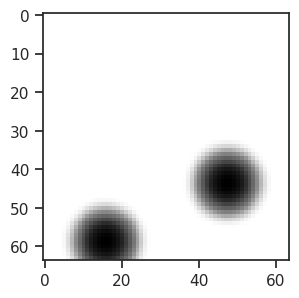

In [15]:
plt.imshow(to_np(tst.tensors[0][16]), cmap='Greys');

In [16]:
tst.tensors[1][16]

tensor([1.2500, 4.6579, 3.7500, 3.4557], device='cuda:1')

In [5]:
from base.balls import balls_sample_latents, render_imgs, bump2d

In [7]:
z_trn, z_tst = balls_sample_latents()
z_tst.shape

(50000, 4)

In [8]:
imgs = render_imgs(z_tst)
imgs.shape

(50000, 64, 64)

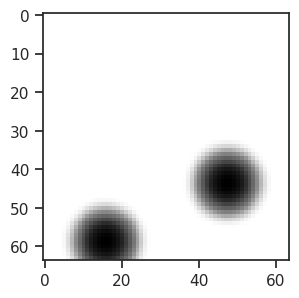

In [9]:
plt.imshow(imgs[16], cmap='Greys');

In [11]:
z_trn.shape

(80000, 4)

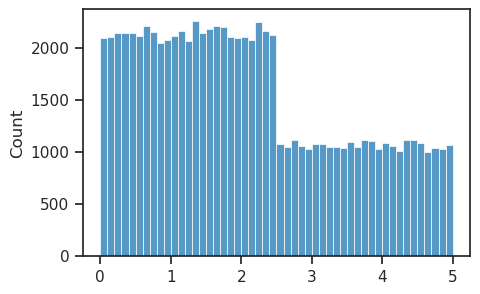

In [12]:
sns.histplot(z_trn[:, 1]);

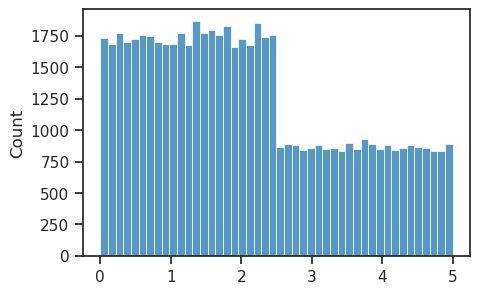

In [15]:
sns.histplot(z_trn[:, 1][:60000]);

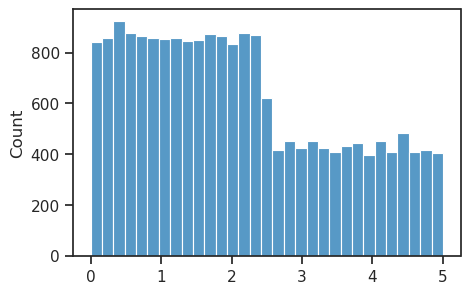

In [16]:
sns.histplot(z_trn[:, 1][60000:]);

In [17]:
z_trn.shape

(80000, 4)

In [33]:
dl = torch.utils.data.DataLoader(None)

In [13]:
np.min(imgs), np.max(imgs)

(0.0, 0.9996062465097197)

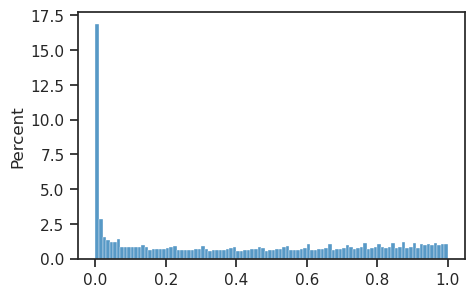

In [14]:
sns.histplot(imgs[imgs.nonzero()], bins=np.linspace(0, 1, 101), stat='percent');

In [249]:
def sample_L_distribution():
    x1 = 5 * 0.25
    x2 = 5 * 0.75

    # rejection sampling
    while True:
        y1 = RNG.uniform(0, 5)
        y2 = RNG.uniform(0, 5)

        if y1 <= 2.5 or y2 <= 2.5:
            img = render_img(x1, 5 - y1, x2, 5 - y2)
            z = np.array([x1, y1, x2, y2])
            return img, z

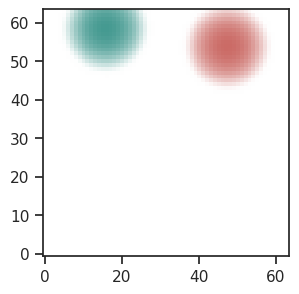

In [250]:
img, z = sample_L_distribution()

fig, ax = create_figure()
ax.imshow(img)
ax.invert_yaxis()
plt.show()

In [251]:
img.shape

(64, 64, 3)

In [252]:
img_all, z_all = [], []
for _ in range(1000):
    img, z = sample_L_distribution()
    img_all.append(img)
    z_all.append(z)

img_all = np.stack(img_all)
z_all = np.stack(z_all)

In [253]:
img_all.shape

(1000, 64, 64, 3)

In [254]:
img_avg = np.linalg.norm(img_all, axis=(0, -1))
img_avg /= img_avg.std()

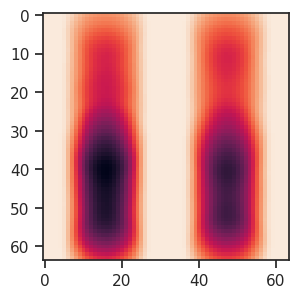

In [255]:
plt.imshow(img_avg)

<Axes: ylabel='Count'>

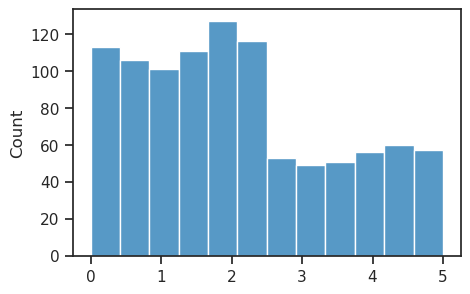

In [230]:
sns.histplot(z_all[:, 3])

<Axes: ylabel='Count'>

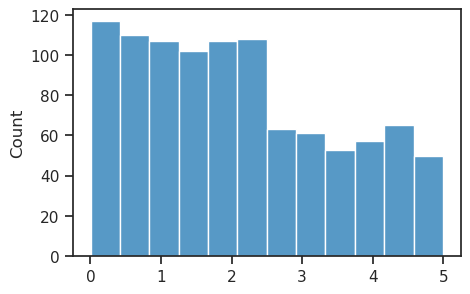

In [231]:
sns.histplot(z_all[:, 1])

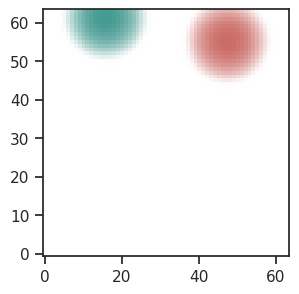

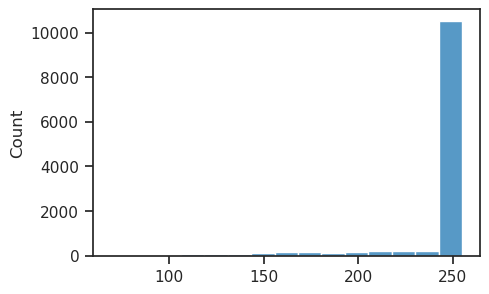

In [114]:
sns.histplot(img.ravel());

## Why correlated?

In [7]:
rng = get_rng(0)

def sample_L_distribution():
    # rejection sampling
    while True:
        y1 = rng.uniform(0, 5)
        y2 = rng.uniform(0, 5)
        x1= 5*0.25
        x2= 5*0.75
        if y1 <= 2.5 or y2 <= 2.5:
            return y1, y2

In [8]:
y1_all, y2_all = [], []
for _ in range(50000):
    y1, y2 = sample_L_distribution()
    y1_all.append(y1)
    y2_all.append(y2)

In [9]:
sp_stats.pearsonr(y1_all, y2_all)

PearsonRResult(statistic=-0.36057968317610867, pvalue=0.0)